# **1. K-Nearest Neighbors 간단한 예제**

## **1-1. 데이터셋 생성**

In [1]:
# 데이터 구성: [x, y, type]

dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]

## **1-2. 거리 계산하기**

- KNN에서 거리 계산은 유클리드 거리를 사용함
- row에는 type까지 포함되어 있기 때문에 마지막 range는 포함하지 않고 계산함

In [2]:
from math import sqrt

In [4]:
# 두 벡터 사이의 유클리드 거리 계산
# row = [x, y, type]

def euclidean_distance(row1, row2):
	distance = 0.0

	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
    
	return sqrt(distance)

- row0 : 새로 들어온 데이터
- 작업내용: row0와 DataSet에 있는 좌표 간의 거리를 계산함

In [5]:
row0 = [3,3]

for row in dataset:
	distance = euclidean_distance(row0, row)
	print(distance)

0.2189163999999999
1.534510628
0.3965616879999998
1.61192981
0.06407232000000018
4.627531214
2.3324412480000003
3.922596716
5.675418650999999
4.673756466


## **1-3. 가장 근처에 있는 요소 뽑기**

- train: 데이터셋
- test_row: 측정하고자 하는 좌표
- num_neighbors: K

In [6]:
# 가장 유사한 이웃 찾기
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
 
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
  
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
 
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
  
	return neighbors

- K = 3일때

In [7]:
neighbors = get_neighbors(dataset, row0, 3)

for neighbor in neighbors:
	print(neighbor)

[3.06407232, 3.005305973, 0]
[2.7810836, 2.550537003, 0]
[3.396561688, 4.400293529, 0]


- 가장 가까운 점 3개의 좌표가 도출됨
- 0 타입이 3개이므로 측정하고자 하는 값은 0 타입임을 알 수 있음

## **1-4. 예측하기**

- 이웃의 값(좌표)에 따라 분류 예측하기

In [8]:
# 이웃에 따른 분류 수행하기
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
 
	for neighbor in neighbors:
		print(neighbor)
  
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
 
	return prediction

- 좌표가 (3, 3)이고 타입이 0인 데이터가 이웃에 따라 어떻게 분류되는가?

In [9]:
row0 = [3,3,0]

prediction = predict_classification(dataset, row0, 3)
print('Expected %d, Got %d.' % (row0[-1], prediction))

[3.06407232, 3.005305973, 0]
[2.7810836, 2.550537003, 0]
[3.396561688, 4.400293529, 0]
Expected 0, Got 0.


- 좌표가 (6, 6)이고 타입이 0인 데이터가 이웃에 따라 어떻게 분류되는가?

In [10]:
row0 = [6,5,0]

prediction = predict_classification(dataset, row0, 3)
print('Expected %d, Got %d.' % (row0[-1], prediction))

[7.673756466, 3.508563011, 1]
[3.396561688, 4.400293529, 0]
[7.627531214, 2.759262235, 1]
Expected 0, Got 1.


# **2. Scikit-Learn을 이용한 KNN**

In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [29]:
# 데이터셋 로드
iris = load_iris()

df = pd.DataFrame(data=np.c_[iris.data, iris.target], columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

X = df[df.columns[:-1]]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [30]:
# 각 데이터 간의 기준이 서로 다르기때문에 데이터 분석에 왜곡된 정보가 저장될 수 있으므로
# KNN 알고리즘을 수행하기 전에 정규화 과정을 거치는 것이 좋음

from sklearn.preprocessing import MinMaxScaler

In [31]:
# 정규화 작업
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

pd.DataFrame(X_train, columns=df.columns[:-1]).head()

,sepal length,sepal width,petal length,petal width
0,0.611111,0.416667,0.813559,0.875000
1,0.333333,0.208333,0.508475,0.500000
2,0.611111,0.416667,0.762712,0.708333
3,0.416667,0.291667,0.491525,0.458333
4,0.694444,0.416667,0.762712,0.833333


In [32]:
X_test = scaler.transform(X_test)
pd.DataFrame(X_test, columns=df.columns[:-1]).head()

,sepal length,sepal width,petal length,petal width
0,0.333333,0.916667,0.067797,0.041667
1,0.305556,0.791667,0.050847,0.125000
2,0.194444,0.625000,0.101695,0.208333
3,0.805556,0.416667,0.813559,0.625000
4,0.750000,0.500000,0.627119,0.541667


In [33]:
# Scikit Learn의 KNN 모듈을 사용함
from sklearn.neighbors import KNeighborsClassifier

In [34]:
# KNN 모델 선언(K=3으로 설정)
k = 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
# 모델 성능 평가
from sklearn.metrics import accuracy_score

In [36]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

- k를 바꿔가면서 정확도 추이를 그려보고 최적의 k를 찾아보기

In [37]:
import matplotlib.pyplot as plt

In [38]:
k_range = range(3, 40)

accuracy_list = []

for k in k_range:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy_list.append(accuracy_score(y_test, y_pred))

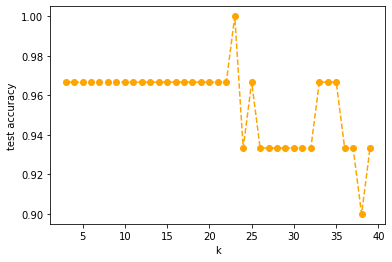

In [39]:
# 시각화
plt.plot(k_range, accuracy_list, 'o--', color='orange')
plt.xlabel("k")
plt.ylabel("test accuracy")
plt.show()

In [43]:
for i in range(len(accuracy_list)):
  print('{}: {}'.format(i, accuracy_list[i]))

0: 0.9666666666666667
1: 0.9666666666666667
2: 0.9666666666666667
3: 0.9666666666666667
4: 0.9666666666666667
5: 0.9666666666666667
6: 0.9666666666666667
7: 0.9666666666666667
8: 0.9666666666666667
9: 0.9666666666666667
10: 0.9666666666666667
11: 0.9666666666666667
12: 0.9666666666666667
13: 0.9666666666666667
14: 0.9666666666666667
15: 0.9666666666666667
16: 0.9666666666666667
17: 0.9666666666666667
18: 0.9666666666666667
19: 0.9666666666666667
20: 1.0
21: 0.9333333333333333
22: 0.9666666666666667
23: 0.9333333333333333
24: 0.9333333333333333
25: 0.9333333333333333
26: 0.9333333333333333
27: 0.9333333333333333
28: 0.9333333333333333
29: 0.9333333333333333
30: 0.9666666666666667
31: 0.9666666666666667
32: 0.9666666666666667
33: 0.9333333333333333
34: 0.9333333333333333
35: 0.9
36: 0.9333333333333333


- 21번째(index:20)에 가장 좋은 값이 나옴